In [1]:
from grenmlin import simulator, grn
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import visualize, get_input_signals, test_inputs

## N:1 MUX

Generalized MUX structure. Boolean formula:
$$
Y = (X_1 \cdot \overline S_1 \cdot \overline S_2 \cdot \dots \cdot \overline S_{\log_2 N}) + (X_2 \cdot S_1 \cdot \overline S_2 \cdot \dots \cdot \overline S_{\log_2 N}) + \dots + (X_N \cdot S_1 \cdot S_2 \cdot \dots \cdot S_{\log_2 N}) 
$$

In [2]:
def make_mux(N):
    # Check if N is power of 2
    if (N < 2) or not (N and (N & (N - 1)) == 0):
        raise ValueError("N must be a power of 2 and larger than 1 (e.g., 2, 4, 8, 16...)")

    num_select_lines = int(np.log2(N))

    # Initialize GRN
    my_grn = grn.grn()

    # Add input species for data lines X1, X2, ..., XN
    for i in range(1, N + 1):
        my_grn.add_input_species(f"X{i}")

    # Add input species for select lines S1, S2, ..., Slog2(N)
    for i in range(1, num_select_lines + 1):
        my_grn.add_input_species(f"S{i}")

    # Add output species for MUX
    my_grn.add_species("MUX", 0.1)

    # MUX logic
    for i in range(1, N + 1):
        # Determine binary representation
        binary_select = f"{i - 1:0{num_select_lines}b}"[::-1]

        # Define regulators for the current gene
        regulators = [{"name": f"X{i}", "type": 1, "Kd": 5, "n": 2}]
        for j, bit in enumerate(binary_select):
            regulators.append({
                "name": f"S{j + 1}",
                "type": 1 if bit == "1" else -1,
                "Kd": 5,
                "n": 3
            })

        # Define products for the current gene
        products = [{"name": "MUX"}]

        # Add the gene to the GRN
        my_grn.add_gene(10, regulators, products)

    # Plot the network
    my_grn.plot_network()

    # Generate input signals
    inputs = get_input_signals(N + num_select_lines, 100)
    
    # Simulate the GRN
    T, Y = simulator.simulate_sequence(my_grn, inputs, t_single=250, plot_on=False)

    # Visualize the results
    visualize(T, Y, my_grn)

    return my_grn


# Testing

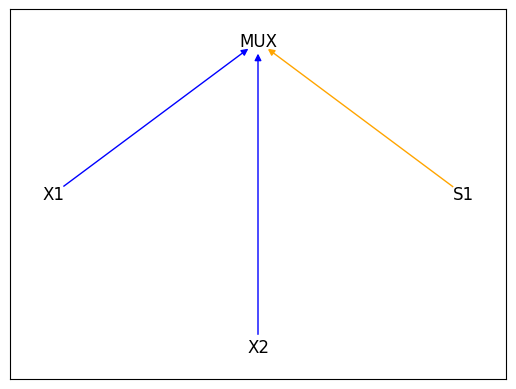

d:\Faks\magisterij\letnik2\semester1\NPMP\Seminarske\seminar2\UC_HW2_GRNM\helper_functions.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


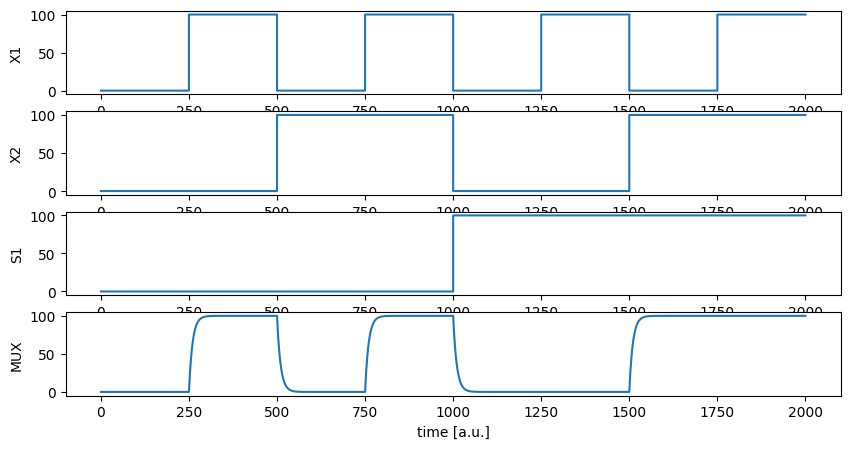

In [3]:
make_mux(2)

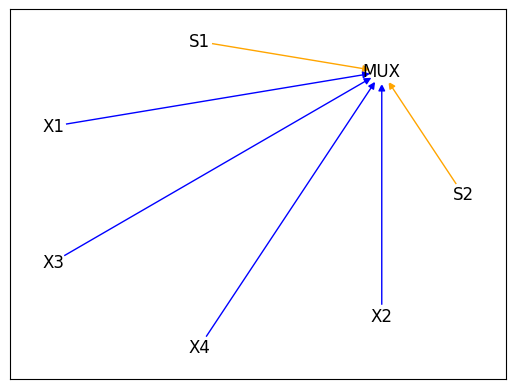

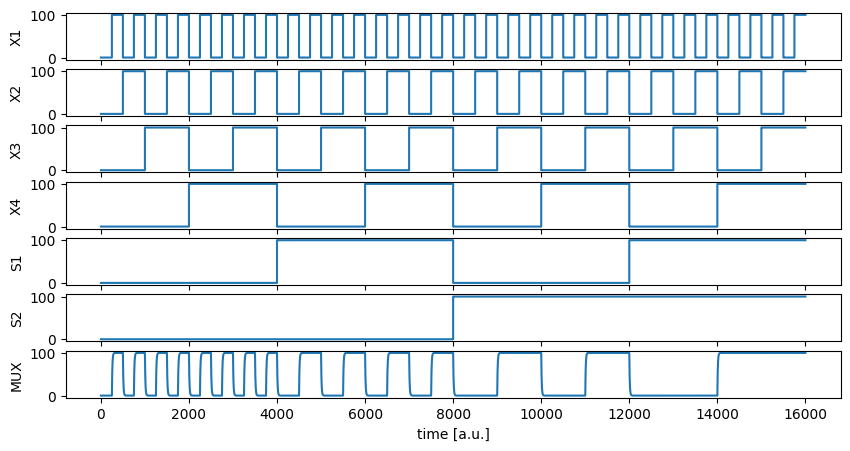

In [4]:
make_mux(4)

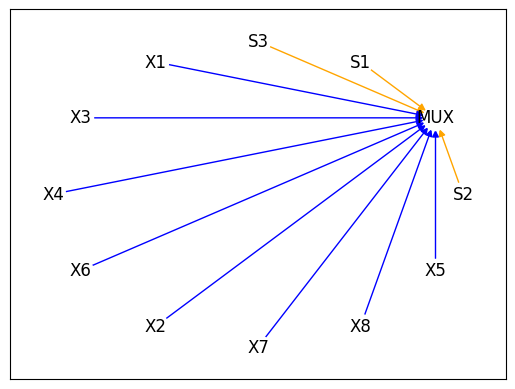

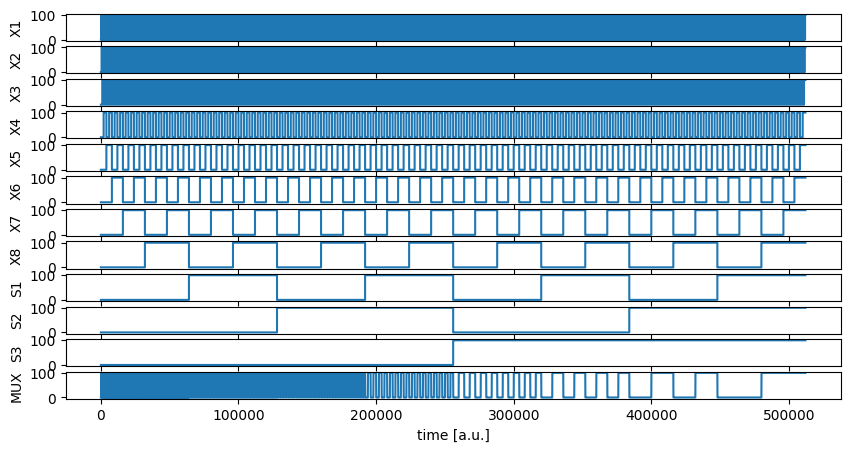

In [5]:
make_mux(8)